# Install requirements

In [1]:
!pip install sklearn pandas
!pip install prettytable
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=b2278871eca9ed10a4e02a285bc606d8387207b32b5e4960e1b8253e6294977a
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read dataset

In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv");
test_features 

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
0,0.049020,0.025641,0.000900,0.010638,0.080882,0.073395,0.009338,0.007011,0.010638,0.012195,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000
1,0.154337,0.102564,0.027003,0.106383,0.118764,0.128599,0.185908,0.176161,0.021277,0.073171,...,0.0,0.0,0.0,0.006803,0.707317,0.076923,0.058824,0.107843,0.147059,0.241379
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.012195,...,0.0,0.0,0.0,0.020408,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.012195,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000
4,0.233244,0.025641,0.002700,0.010638,0.115607,0.140845,0.016978,0.017528,0.010638,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029412,0.009804,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0.551622,0.230769,0.060306,0.143617,0.378549,0.451737,0.101868,0.102542,0.010638,0.036585,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4171,0.527022,0.269231,0.042304,0.361702,0.464638,0.457348,0.479626,0.390009,0.010638,0.036585,...,0.0,0.0,0.0,0.000000,0.146341,0.000000,0.029412,0.333333,0.147059,0.000000
4172,0.512865,0.269231,0.032853,0.239362,0.475449,0.482117,0.337012,0.295355,0.021277,0.024390,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.186275,0.323529,0.034483
4173,0.880768,0.358974,0.025653,0.239362,0.796875,0.837838,0.303056,0.271691,0.021277,0.024390,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.058824,0.250000,0.000000


In [5]:
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv");
train_features

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.012195,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.014706,0.000000
1,1.000000,0.012821,0.000450,0.005319,1.000000,1.000000,0.017827,0.015776,0.042553,0.000000,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.350291,0.064103,0.008551,0.026596,0.320652,0.372549,0.050085,0.049956,0.010638,0.060976,...,0.000000,0.0,0.0,0.000000,0.04878,0.153846,0.000000,0.019608,0.000000,0.000000
3,0.085142,0.012821,0.001800,0.005319,0.048711,0.058621,0.014431,0.014899,0.085106,0.036585,...,0.000000,0.0,0.0,0.027211,0.00000,0.153846,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.024390,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.036585,...,0.000000,0.0,0.0,0.006803,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
17996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.219512,...,0.000000,0.0,0.0,0.068027,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
17997,0.048350,0.012821,0.000900,0.010638,0.046948,0.054878,0.016978,0.015776,0.042553,0.012195,...,0.043478,0.0,0.0,0.027211,0.00000,0.000000,0.000000,0.039216,0.088235,0.068966
17998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,0.036585,...,0.000000,0.0,0.0,0.047619,0.02439,0.000000,0.029412,0.000000,0.000000,0.000000


In [6]:
train_features.describe(include="all")

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.123279,0.028774,0.004559,0.024134,0.105443,0.113809,0.038147,0.034204,0.027549,0.035694,...,0.002815,0.000356,0.000667,0.012957,0.009144,0.012987,0.029230,0.028823,0.033788,0.014446
std,0.204047,0.067085,0.022278,0.071112,0.178428,0.187000,0.098027,0.085990,0.051049,0.044911,...,0.028880,0.010744,0.022964,0.029939,0.041314,0.059497,0.085071,0.093036,0.093071,0.063803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.012195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.180893,0.025641,0.003150,0.015957,0.148867,0.168421,0.028862,0.028046,0.031915,0.048780,...,0.000000,0.000000,0.000000,0.013605,0.000000,0.000000,0.029412,0.009804,0.014706,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for col in train_features.columns:
  print(col, train_features[col].max())

CC 1.0
CCL 1.0
CCO 1.0
CI 1.0
CLC 1.0
CLLC 1.0
LDC 1.0
LLDC 1.0
LCOM5 1.0
NL 1.0
NLE 1.0
WMC 1.0
CBO 1.0
CBOI 1.0
NII 1.0
NOI 1.0
RFC 1.0
AD 1.0
CD 1.0
CLOC 1.0
DLOC 1.0
PDA 1.0
PUA 1.0
TCD 1.0
TCLOC 1.0
DIT 1.0
NOA 1.0
NOC 1.0
NOD 1.0
NOP 1.0
LLOC 1.0
LOC 1.0
NA 1.0
NG 1.0
NLA 1.0
NLG 1.0
NLM 1.0
NLPA 1.0
NLPM 1.0
NLS 1.0
NM 1.0
NOS 1.0
NPA 1.0
NPM 1.0
NS 1.0
TLLOC 1.0
TLOC 1.0
TNA 1.0
TNG 1.0
TNLA 1.0
TNLG 1.0
TNLM 1.0
TNLPA 1.0
TNLPM 1.0
TNLS 1.0
TNM 1.0
TNOS 1.0
TNPA 1.0
TNPM 1.0
TNS 1.0
WarningCritical 1.0
WarningMajor 1.0
WarningMinor 1.0
Basic Rules 1.0
Brace Rules 1.0
Clone Implementation Rules 1.0
Controversial Rules 1.0
Design Rules 1.0
Empty Code Rules 1.0
Finalizer Rules 1.0
Import Statement Rules 1.0
J2EE Rules 1.0
JUnit Rules 1.0
Jakarta Commons Logging Rules 1.0
Java Logging Rules 1.0
JavaBean Rules 1.0
Migration Rules 1.0
Naming Rules 1.0
Optimization Rules 1.0
Security Code Guideline Rules 1.0
Strict Exception Rules 1.0
String and StringBuffer Rules 1.0
Type Resolution

In [8]:
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv");
test_target

,Number of Bugs
0,0
1,0
2,2
3,1
4,0
...,...
4170,0
4171,0
4172,1
4173,0


In [9]:
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv");
train_target 

,Number of Bugs
0,1
1,1
2,1
3,1
4,1
...,...
17995,2
17996,2
17997,2
17998,2


# Call **Decision tree** from `sklearn`

In [10]:
print('Decision tree')
from sklearn import tree

head = PrettyTable(['random_state', 'max_depth', 'confusion_matrix', 'classification_report', 'f1_score_micro_test', 'f1_score_micro_train']) 

f1_score_micro_test_array = []
f1_score_micro_train_array = []

max_depth_range = list(range(1, 32))
for depth in max_depth_range:

  '''Create decision tree classifier'''    
  model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 90)
  
  '''Train and test'''
  model.fit(train_features, train_target)
  preds_test = model.predict(test_features)
  preds_train = model.predict(train_features)
  confusion_matrix1 = confusion_matrix(test_target, preds_test)
  classification_report1 = classification_report(test_target, preds_test)

  from sklearn.metrics import f1_score

  f1_weighted = f1_score(test_target, preds_test, average = 'weighted')
  f1_macro = f1_score(test_target, preds_test, average = 'macro')
  f1_micro_test = f1_score(test_target, preds_test, average = 'micro')
  f1_micro_train = f1_score(train_target, preds_train, average = 'micro')

  f1_score_weighted = "%.2f"%round(f1_weighted, 2)
  f1_score_macro = "%.2f"%round(f1_macro, 2)
  f1_score_micro_test = "%.2f"%round(f1_micro_test, 2)
  f1_score_micro_train = "%.2f"%round(f1_micro_train, 2)

  f1_score_micro_test_array.append(f1_score_micro_test)
  f1_score_micro_train_array.append(f1_score_micro_train)

  head.add_row(['90', depth, confusion_matrix1, classification_report1, f1_score_micro_test, f1_score_micro_train])
print(head)


Decision tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

+--------------+-----------+--------------------+-------------------------------------------------------+---------------------+----------------------+
| random_state | max_depth |  confusion_matrix  |                 classification_report                 | f1_score_micro_test | f1_score_micro_train |
+--------------+-----------+--------------------+-------------------------------------------------------+---------------------+----------------------+
|      90      |     1     | [[ 805    0 1237]  |               precision    recall  f1-score   support |         0.34        |         0.39         |
|              |           |  [ 429    0  898]  |                                                       |                     |                      |
|              |           |  [ 184    0  622]] |            0       0.57      0.39      0.47      2042 |                     |                      |
|              |           |                    |            1       0.00      0.00      0.00 

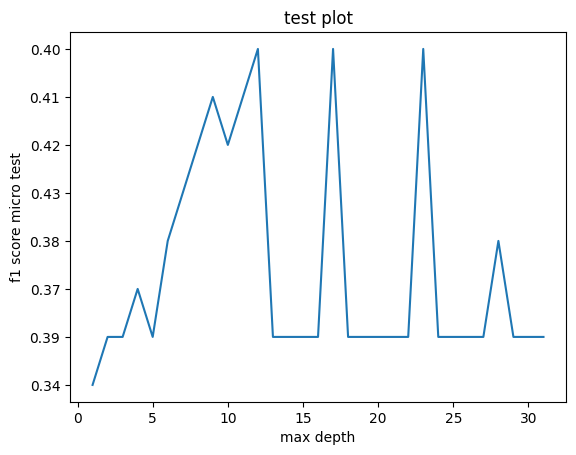

In [13]:
plt.plot(max_depth_range, f1_score_micro_test_array) 
plt.xlabel('max depth') 
plt.ylabel('f1 score micro test') 
plt.title('test plot') 
plt.show()

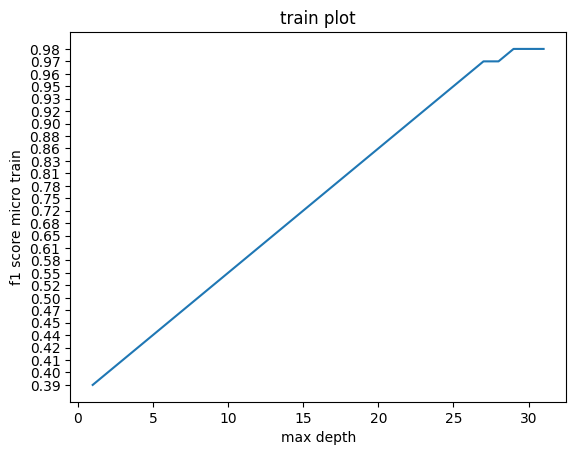

In [14]:
plt.plot(max_depth_range, f1_score_micro_train_array) 
plt.xlabel('max depth') 
plt.ylabel('f1 score micro train') 
plt.title('train plot') 
plt.show()